# Nutrition and Calorie Analysis

## Introduction

Nutritional intake plays a crucial role in maintaining a balanced and healthy lifestyle. Calories, proteins, carbohydrates, and fats are essential macronutrients that influence energy levels, muscle development, and overall well-being. In today's fast-paced environment, understanding the relationship between these nutrients and dietary habits is essential for making informed food choices.

This project aims to analyze nutritional data, particularly focusing on calorie distribution, macronutrient balance, and dietary trends. With the help of data exploration and clustering techniques, we aim to:

- Analyze correlations between macronutrients and calorie intake.

- Detect outliers in nutritional values using statistical methods.

- Provide insights and recommendations for dietary improvements based on data-driven analysis.

## Dataset Overview

The dataset consists of nutritional information from various food sources, capturing key attributes such as:

- Calories: Total energy content per serving.

- Proteins: Essential for muscle growth and repair.

- Carbohydrates: Primary source of energy.

- Fats: Necessary for various bodily functions and energy storage.

## Key Features in Dataset

- Caloric Distribution: Understanding how calories vary across different food types.

- Macronutrient Balance: Analyzing the proportion of proteins, carbohydrates, and fats.

- Dietary Categorization: Exploring food categories and their impact on nutritional intake.

- Outlier Detection: Identifying extreme values using the Interquartile Range (IQR) method.

## Data Exploration and Analysis

The analysis covers multiple aspects, including:

### Structure of the Dataset

- Number of features and samples.

- Missing values assessment.

- Identification of redundant or irrelevant features.

### Data Distribution

- Distribution of calorie values (normal vs. skewed distribution).

- Examination of macronutrient distributions (proteins, carbohydrates, fats).

- Detection of outliers in the nutritional data.

### Feature Correlation

- Identifying strong correlations between different nutrients.

- Analyzing the relationship between fat content and calorie levels.

- Dietary Insights

- Categorizing food items based on their nutritional properties.

- Identifying high-calorie food groups.

- Evaluating the balance between protein, fat, and carbohydrate intake.




In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'Dataset/food-nutrition.csv'

df = pd.read_csv(file)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2274 non-null   object 
 1   calories      2274 non-null   float64
 2   fat           2274 non-null   float64
 3   proteins      2274 non-null   float64
 4   carbohydrate  2274 non-null   float64
 5   Meal Type     2274 non-null   object 
dtypes: float64(4), object(2)
memory usage: 106.7+ KB
None
          calories          fat     proteins  carbohydrate
count  2274.000000  2274.000000  2274.000000   2274.000000
mean    184.038083     7.501548     7.950413     22.302155
std     179.180541    15.562329    13.095547     27.796933
min       0.000000     0.000000     0.000000      0.000000
25%      61.000000     0.300000     0.800000      3.700000
50%     126.000000     1.300000     2.900000     13.500000
75%     259.500000     6.300000    10.700000     32.200000
max    1010.000000 

In [45]:
df.head()

,name,calories,fat,proteins,carbohydrate,Meal Type
0,chocolate pudding fat free,105.0,0.3,2.2,23.6,Drink
1,tapioca pudding,143.0,4.3,2.1,23.9,Snack
2,tapioca pudding fat free,105.0,0.4,1.6,23.9,Snack
3,rice pudding,122.0,2.4,3.6,20.8,Carbs
4,corn pudding,328.0,12.6,11.1,42.4,Carbs


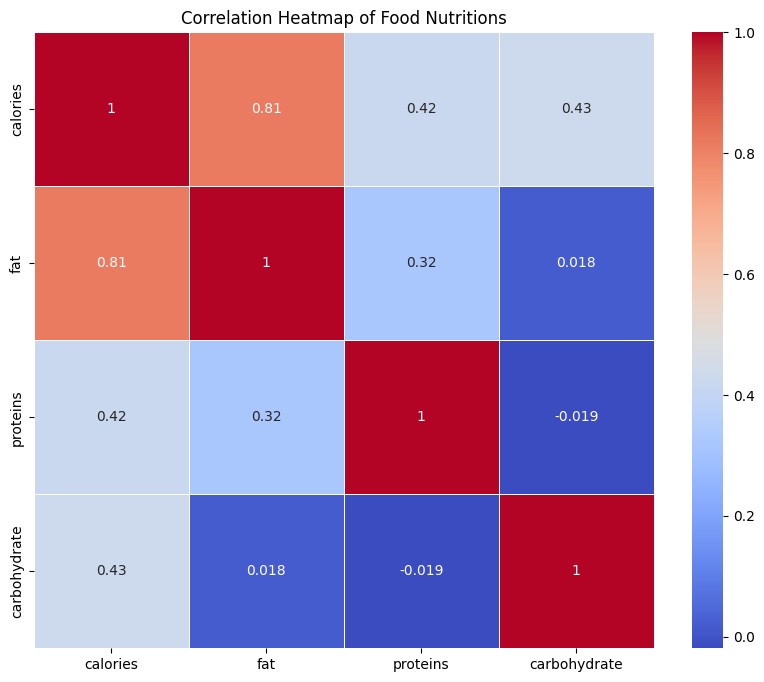

In [46]:
# Subset of columns for correlation analysist
selected_columns = ['calories', 'fat', 'proteins', 'carbohydrate']

# Find the correlation between the columns
corr_matrix = df[selected_columns].corr()

# Show the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Food Nutritions')
plt.show()

## Calories Affected on Carbohydrate

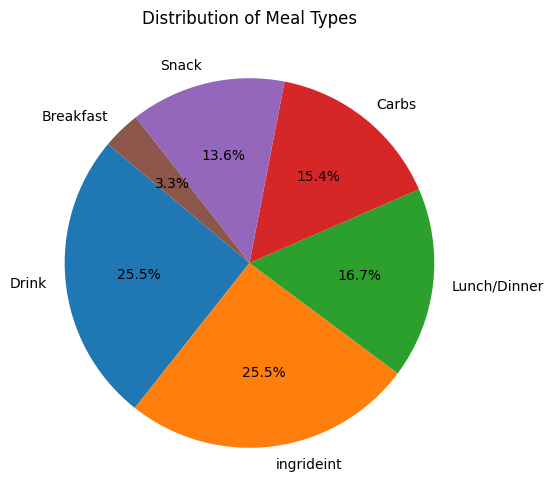

In [47]:
meal_counts = df['Meal Type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(meal_counts, labels=meal_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Meal Types')
plt.show()

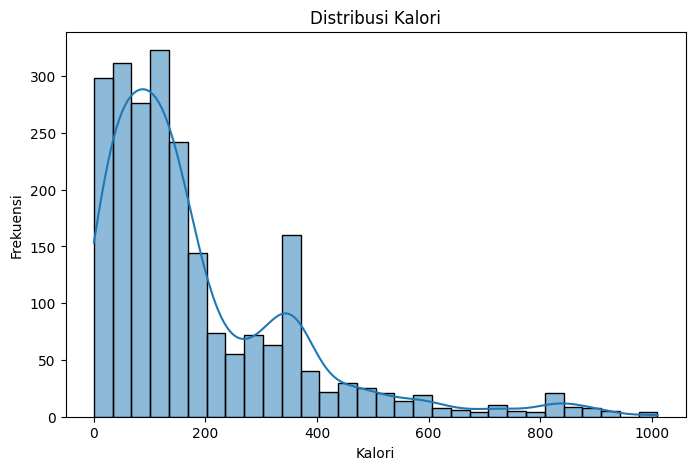

In [48]:
# Show calories distribution
plt.figure(figsize=(8,5))
sns.histplot(df['calories'], bins=30, kde=True)
plt.title('Distribusi Kalori')
plt.xlabel('Kalori')
plt.ylabel('Frekuensi')
plt.show()

In [49]:
df['calories'].describe()

count    2274.000000
mean      184.038083
std       179.180541
min         0.000000
25%        61.000000
50%       126.000000
75%       259.500000
max      1010.000000
Name: calories, dtype: float64

In [50]:
correlation = df[['calories', 'carbohydrate', 'fat', 'proteins']].corr()
print(correlation['calories'])

calories        1.000000
carbohydrate    0.434587
fat             0.813653
proteins        0.422220
Name: calories, dtype: float64


<Axes: xlabel='calories'>

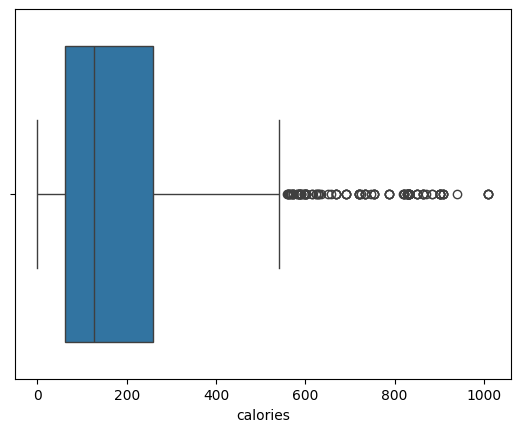

In [51]:
sns.boxplot(x=df['calories'])

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_17470/1142450410.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='calories', y='Meal Type', data=df, palette='viridis')


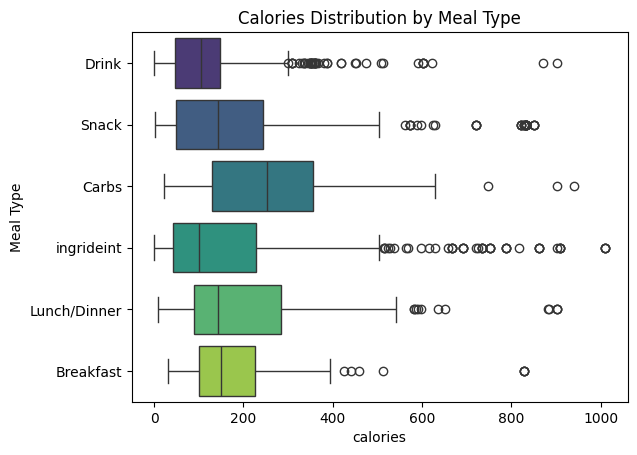

In [52]:
sns.boxplot(x='calories', y='Meal Type', data=df, palette='viridis')
plt.title('Calories Distribution by Meal Type')
plt.show()

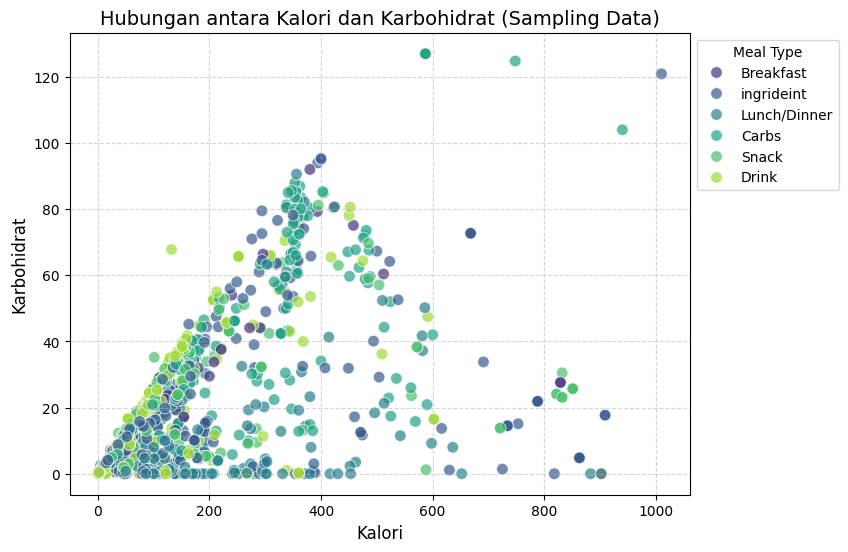

In [53]:
df_sampled = df.sample(frac=0.5, random_state=42)  

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_sampled, x='calories', y='carbohydrate', hue='Meal Type', alpha=0.7, s=70, palette='viridis')

plt.title("Hubungan antara Kalori dan Karbohidrat (Sampling Data)", fontsize=14)
plt.xlabel("Kalori", fontsize=12)
plt.ylabel("Karbohidrat", fontsize=12)
plt.legend(title="Meal Type", bbox_to_anchor=(1,1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

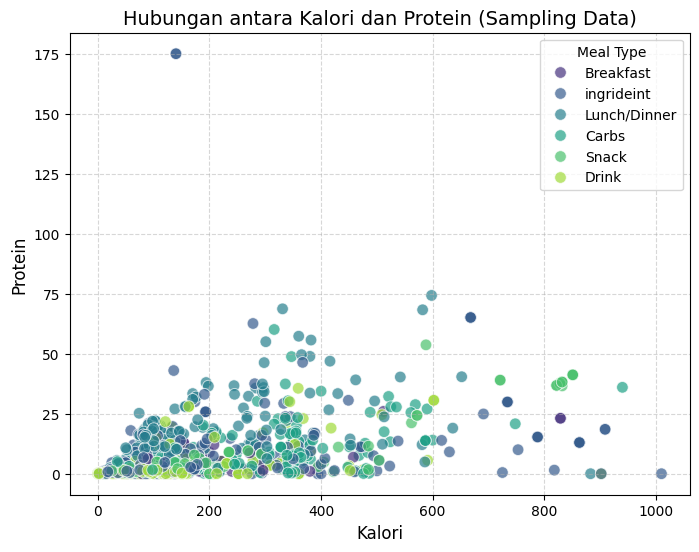

In [54]:
df_sampled = df.sample(frac=0.5, random_state=42)  

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_sampled, x='calories', y='proteins', hue='Meal Type', alpha=0.7, s=70, palette='viridis')

plt.title("Hubungan antara Kalori dan Protein (Sampling Data)", fontsize=14)
plt.xlabel("Kalori", fontsize=12)
plt.ylabel("Protein", fontsize=12)
plt.legend(title="Meal Type", bbox_to_anchor=(1,1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

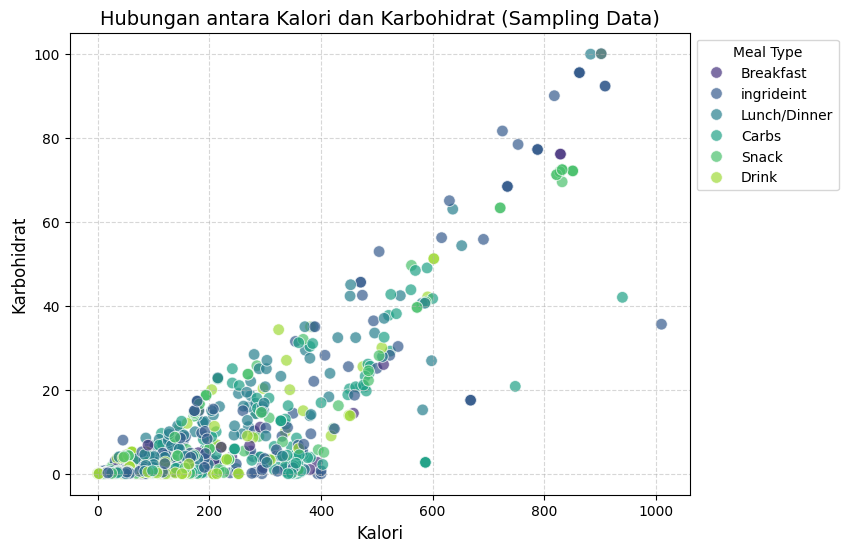

In [55]:
df_sampled = df.sample(frac=0.5, random_state=42)  

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_sampled, x='calories', y='fat', hue='Meal Type', alpha=0.7, s=70, palette='viridis')

plt.title("Hubungan antara Kalori dan Karbohidrat (Sampling Data)", fontsize=14)
plt.xlabel("Kalori", fontsize=12)
plt.ylabel("Karbohidrat", fontsize=12)
plt.legend(title="Meal Type", bbox_to_anchor=(1,1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Food for diet

In [56]:
low_carb = df[df['carbohydrate'] < 20]
high_protein = df[df['proteins'] > 20]
low_calorie_high_protein = df[(df['calories'] < 200) & (df['proteins'] > 15)]

print("\n1. Makanan rendah karbohidrat:\n")
low_carb.head()



1. Makanan rendah karbohidrat:



,name,calories,fat,proteins,carbohydrate,Meal Type
8,profeel proteiinirahka valio,140.0,0.4,175.0,19.3,ingrideint
9,cottage cheese creamed,20.0,0.9,2.2,0.7,Drink
10,zaziki milfina,51.0,4.4,0.0,0.0,Lunch/Dinner
11,cottage cheese low fat,163.0,2.3,28.0,6.1,Drink
12,cottage cheese nonfat,104.0,0.4,15.0,9.7,Drink


In [57]:
print("\n2. Makanan tinggi protein:\n")
high_protein.head()


2. Makanan tinggi protein:



,name,calories,fat,proteins,carbohydrate,Meal Type
8,profeel proteiinirahka valio,140.0,0.4,175.0,19.3,ingrideint
11,cottage cheese low fat,163.0,2.3,28.0,6.1,Drink
152,lupins cooked,193.0,4.8,25.8,15.4,ingrideint
157,peanuts cooked,572.0,39.6,24.3,38.3,Snack
158,pumpkin squash seeds dried,721.0,63.3,39.0,13.8,Snack


In [58]:
print("\n3. Makanan rendah kalori tapi tinggi protein:\n")
low_calorie_high_protein.head()


3. Makanan rendah kalori tapi tinggi protein:



,name,calories,fat,proteins,carbohydrate,Meal Type
8,profeel proteiinirahka valio,140.0,0.4,175.0,19.3,ingrideint
11,cottage cheese low fat,163.0,2.3,28.0,6.1,Drink
28,greek yogurt,100.0,0.7,17.3,6.1,Breakfast
152,lupins cooked,193.0,4.8,25.8,15.4,ingrideint
240,profeel proteiinirahka valio,140.0,0.4,175.0,19.3,ingrideint


## Detected outliers

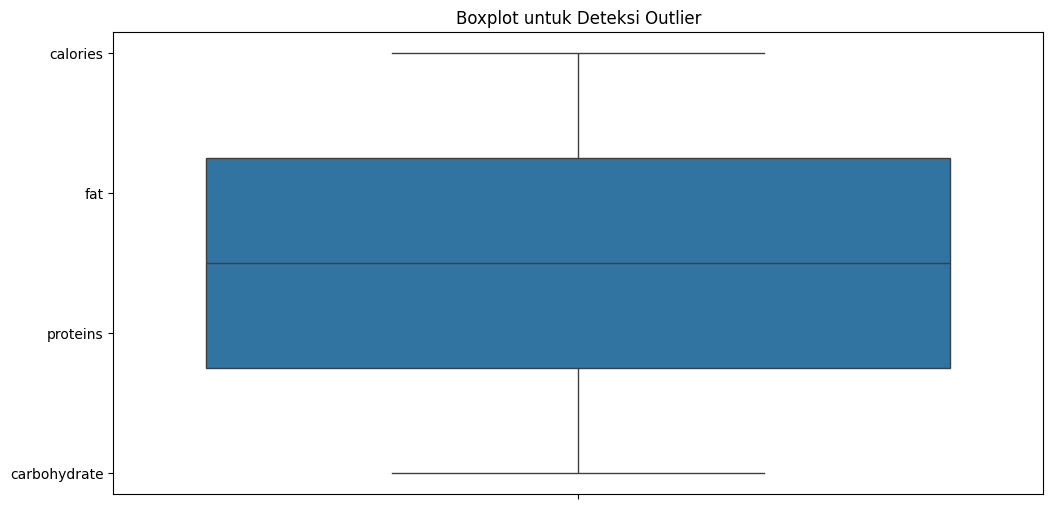

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(data=selected_columns)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()


In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers

# Detect outliers for each column
outliers_dict = {col: detect_outliers_iqr(df, col) for col in ['calories', 'proteins', 'carbohydrate', 'fat']}

# Print outlier 
for col, outliers in outliers_dict.items():
    print(f"Jumlah outliers pada {col}: {len(outliers)}")


Jumlah outliers pada calories: 115
Jumlah outliers pada proteins: 174
Jumlah outliers pada carbohydrate: 122
Jumlah outliers pada fat: 314


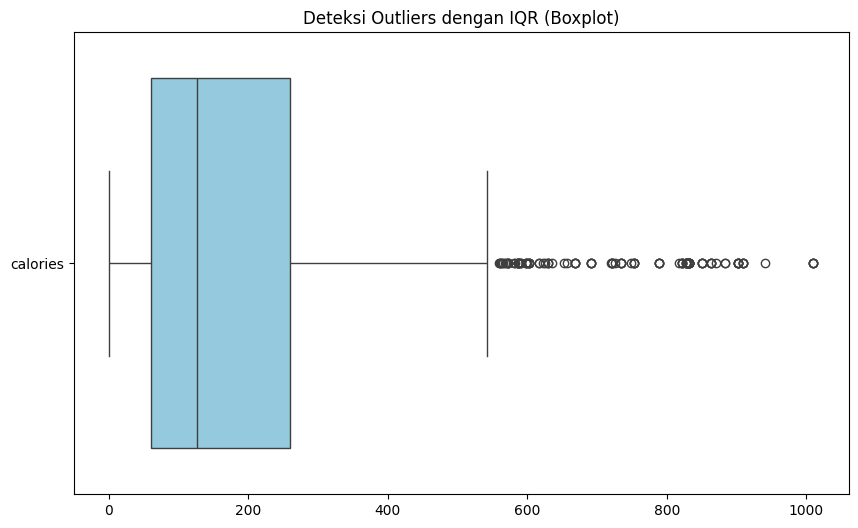

/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


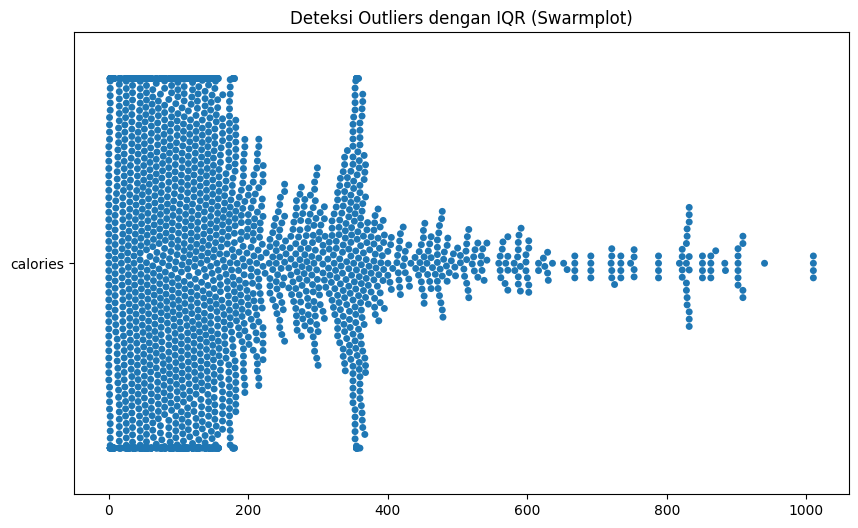

In [76]:
# Visualize with boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['calories']], orient="h", color='skyblue')
plt.title("Deteksi Outliers dengan IQR (Boxplot)")
plt.show()

# Visualize with swarmplot
plt.figure(figsize=(10,6))
sns.swarmplot(data=df[['calories']], orient="h")
plt.title("Deteksi Outliers dengan IQR (Swarmplot)")
plt.show()

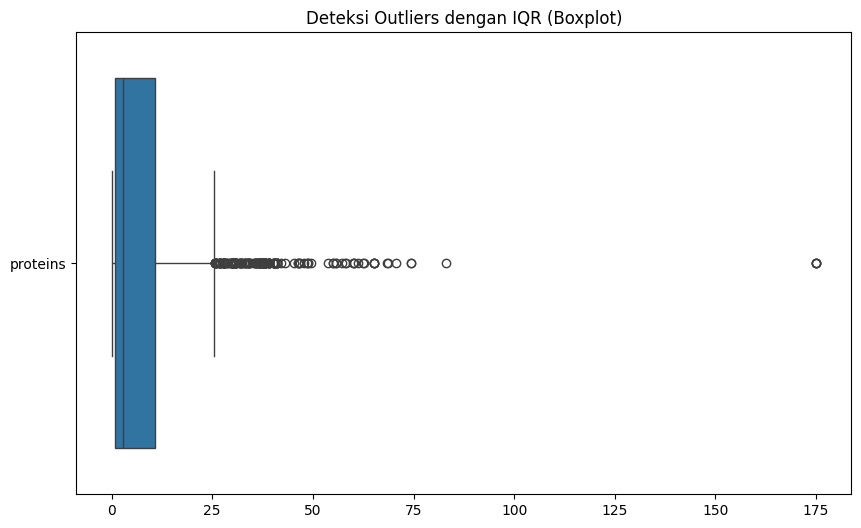

/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 61.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


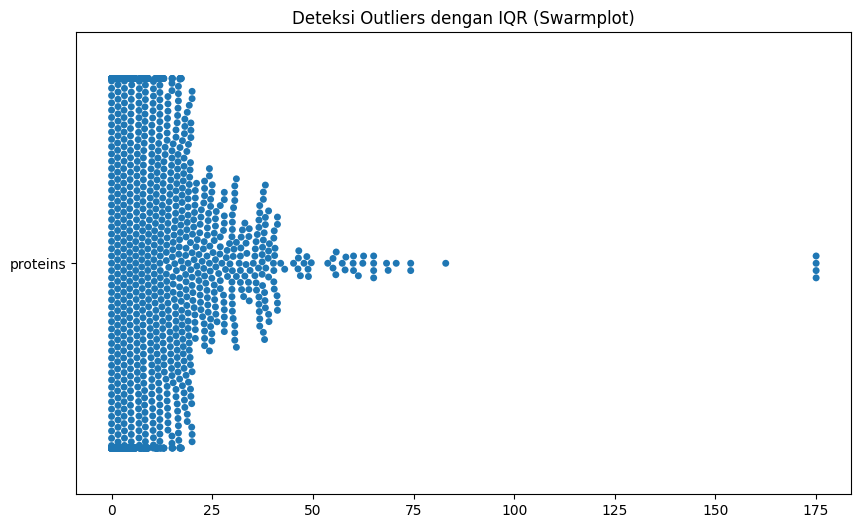

In [77]:
# Visualize with boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['proteins']], orient="h")
plt.title("Deteksi Outliers dengan IQR (Boxplot)")
plt.show()

# Visualize with swarmplot
plt.figure(figsize=(10,6))
sns.swarmplot(data=df[['proteins']], orient="h")
plt.title("Deteksi Outliers dengan IQR (Swarmplot)")
plt.show()

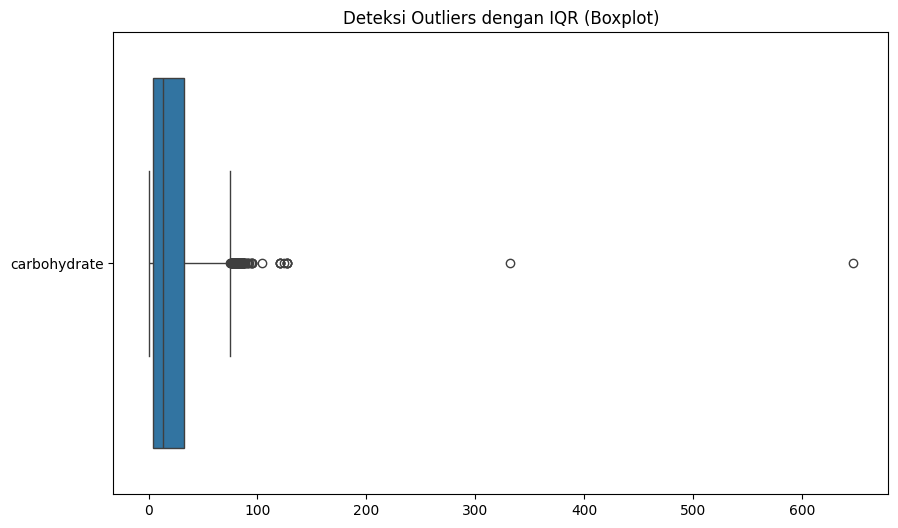

/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 68.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


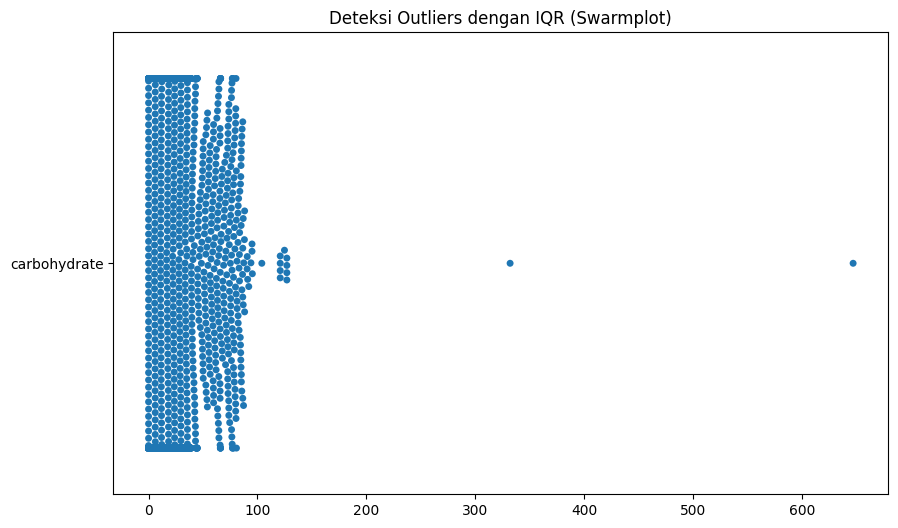

In [79]:
# Visualize with boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['carbohydrate']], orient="h")
plt.title("Deteksi Outliers dengan IQR (Boxplot)")
plt.show()

# Visualize with swarmplot
plt.figure(figsize=(10,6))
sns.swarmplot(data=df[['carbohydrate']], orient="h")
plt.title("Deteksi Outliers dengan IQR (Swarmplot)")
plt.show()

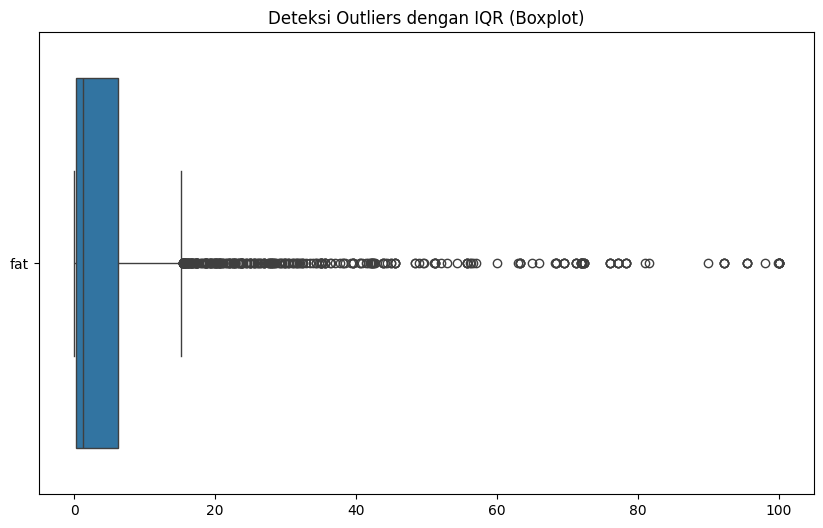

/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


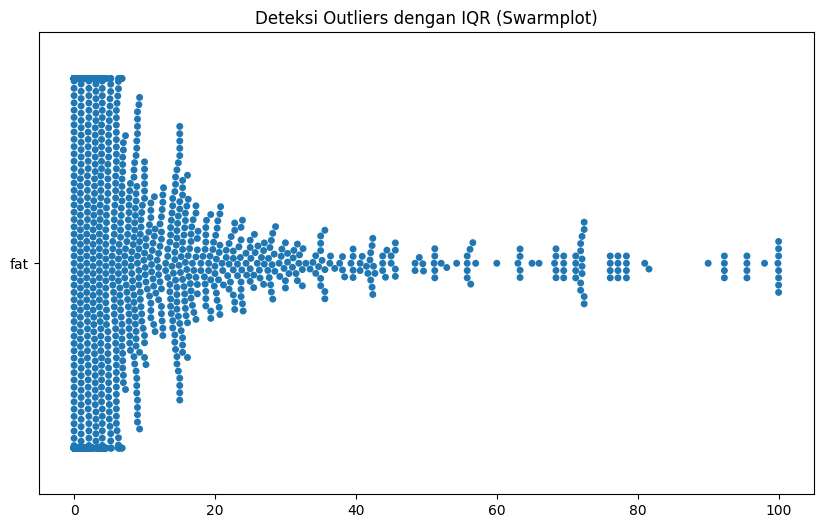

In [80]:
# Visualize with boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['fat']], orient="h")
plt.title("Deteksi Outliers dengan IQR (Boxplot)")
plt.show()

# Visualize with swarmplot
plt.figure(figsize=(10,6))
sns.swarmplot(data=df[['fat']], orient="h")
plt.title("Deteksi Outliers dengan IQR (Swarmplot)")
plt.show()

/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/kaleee/Football-Analysis-2/.conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

Text(0.5, 1.02, 'Pairplot of Food Nutritions')

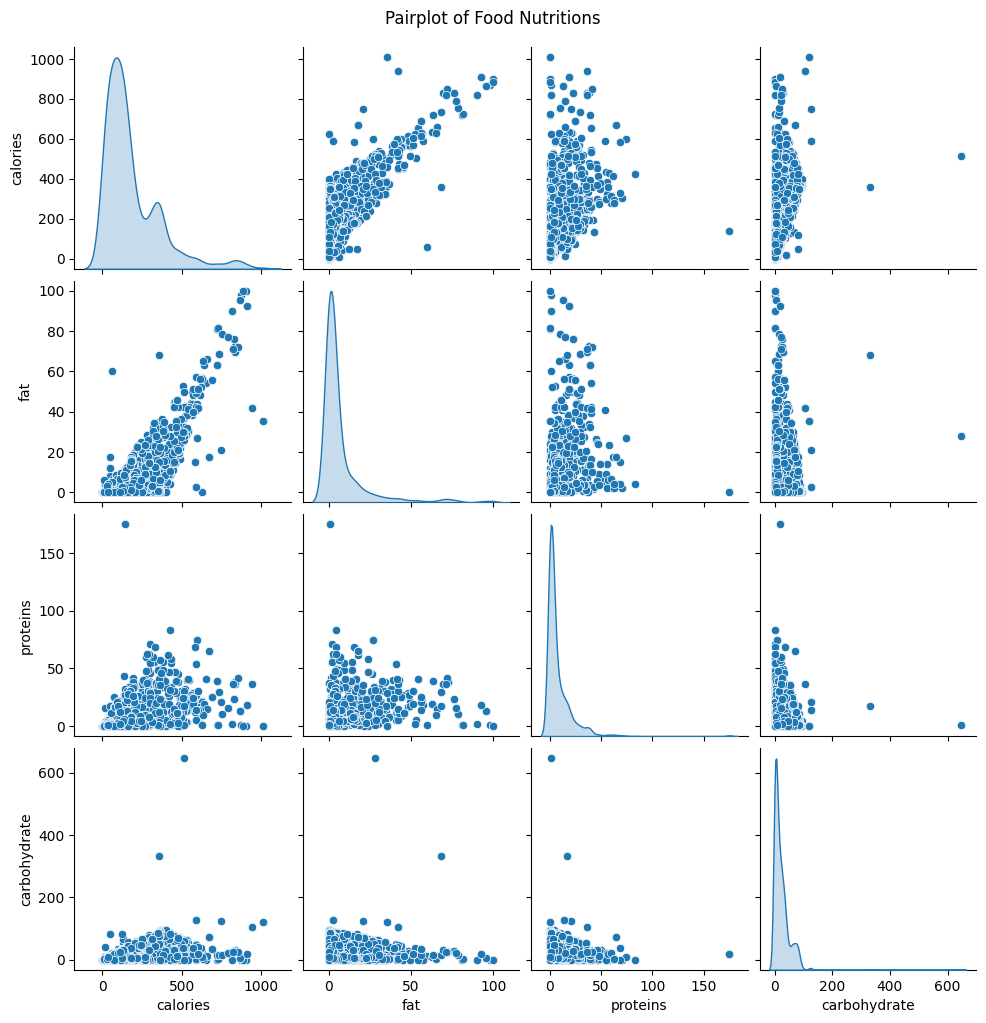

In [59]:
sns.pairplot(df[selected_columns], kind='scatter', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Food Nutritions', y=1.02)